# **Gender gaps as employers in high-tech companies**
** Machine Learning - Final Project **

Eng Safaa Azbarqa - 211342530



# New Section

setting up Kaggle & download the dataset

In [ ]:
import json
import os

!mkdir /root/.kaggle/
api_token = {"username":"safaaazbarqa","key":"cb765b192e6a8751fd22e76f0b39de0a"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets
!mkdir ./datasets/ibm-hr

# download the dataset from Kaggle and unzip it
!kaggle datasets download pavansubhasht/ibm-hr-analytics-attrition-dataset  -p ./datasets/ibm-hr
!unzip ./datasets/ibm-hr/*.zip  -d ./datasets/ibm-hr/


  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 32.0MB/s]
Archive:  ./datasets/ibm-hr/ibm-hr-analytics-attrition-dataset.zip
  inflating: ./datasets/ibm-hr/WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read the dataset using turicreate

In [ ]:
#%matplotlib inline
import turicreate as tc

ibm_hr_dataset_path = "./datasets/ibm-hr/WA_Fn-UseC_-HR-Employee-Attrition.csv"
sf = tc.SFrame.read_csv(ibm_hr_dataset_path)
sf

Finished parsing file /content/datasets/ibm-hr/WA_Fn-UseC_-HR-Employee-Attrition.csv

Parsing completed. Parsed 100 lines in 0.092593 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,int,str,int,int,str,int,int,int,str,int,int,int,str,int,str,int,int,int,str,str,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/ibm-hr/WA_Fn-UseC_-HR-Employee-Attrition.csv

Parsing completed. Parsed 1470 lines in 0.061867 secs.

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education
41,Yes,Travel_Rarely,1102,Sales,1,2
49,No,Travel_Frequently,279,Research & Development,8,1
37,Yes,Travel_Rarely,1373,Research & Development,2,2
33,No,Travel_Frequently,1392,Research & Development,3,4
27,No,Travel_Rarely,591,Research & Development,2,1
32,No,Travel_Frequently,1005,Research & Development,2,2
59,No,Travel_Rarely,1324,Research & Development,3,3
30,No,Travel_Rarely,1358,Research & Development,24,1
38,No,Travel_Frequently,216,Research & Development,23,3
36,No,Travel_Rarely,1299,Research & Development,27,3


The number of males vs the number of females

In [ ]:
import turicreate.aggregate as agg
sf1=sf['Gender','EmployeeCount']
g = sf1.groupby(['Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count')
#g.print_rows(num_rows=300) 
g[0],g[1]

({'Count': 588, 'Gender': 'Female'}, {'Count': 882, 'Gender': 'Male'})

The percentage of each gender

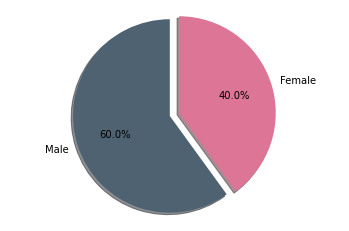

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'

sizes = [882/1470, 588/1470]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors=['#4F6272', '#DD7596'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The differences in terms of total working years 

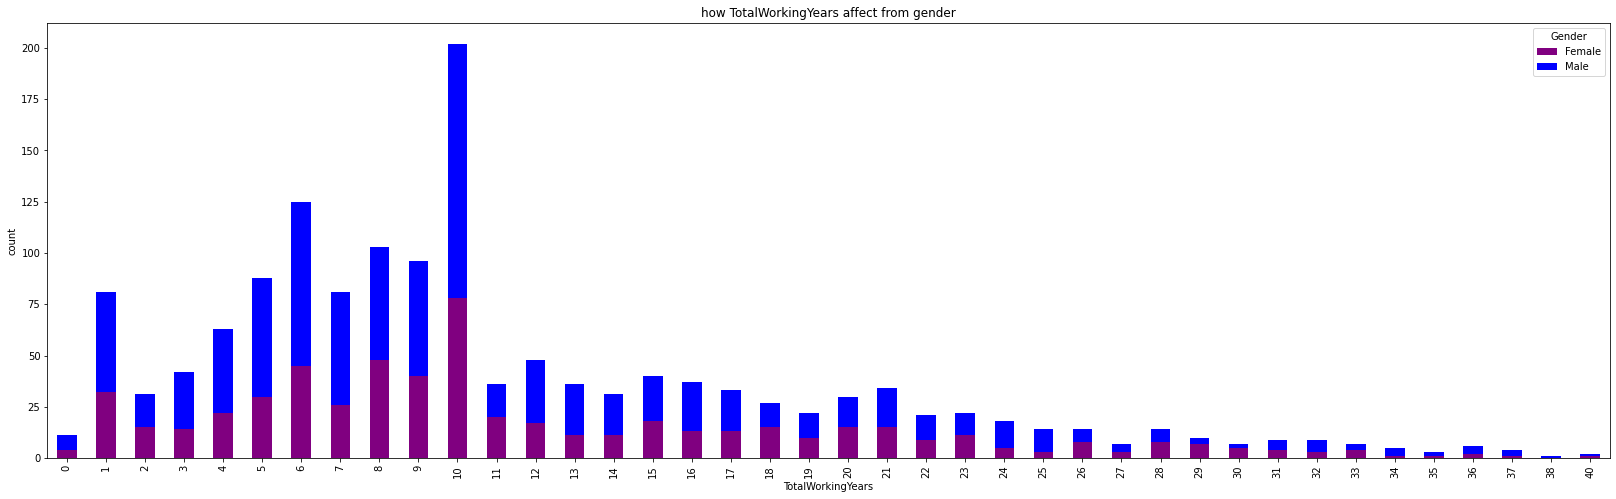

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("/content/datasets/ibm-hr/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df_woy = df.loc[:,['TotalWorkingYears','Gender']]
df_woy_graph = df_woy.pivot_table(index = 'TotalWorkingYears', columns=['Gender'], aggfunc = len)
df_woy_graph.head(5)
df_woy_graph.plot(kind = 'bar',title='how TotalWorkingYears affect from gender',stacked = True, color = ['purple','blue'], figsize = (28,8), ylabel = 'count')


The differences between a man and a woman in terms of age

+-----+--------+-------+
| Age | Gender | Count |
+-----+--------+-------+
|  18 | Female |   4   |
|  18 |  Male  |   4   |
|  19 | Female |   4   |
|  19 |  Male  |   5   |
|  20 | Female |   6   |
|  20 |  Male  |   5   |
|  21 |  Male  |   7   |
|  21 | Female |   6   |
|  22 | Female |   5   |
|  22 |  Male  |   11  |
|  23 |  Male  |   13  |
|  23 | Female |   1   |
|  24 |  Male  |   15  |
|  24 | Female |   11  |
|  25 | Female |   6   |
|  25 |  Male  |   20  |
|  26 |  Male  |   25  |
|  26 | Female |   14  |
|  27 |  Male  |   26  |
|  27 | Female |   22  |
|  28 |  Male  |   36  |
|  28 | Female |   12  |
|  29 |  Male  |   39  |
|  29 | Female |   29  |
|  30 |  Male  |   34  |
|  30 | Female |   26  |
|  31 | Female |   28  |
|  31 |  Male  |   41  |
|  32 | Female |   23  |
|  32 |  Male  |   38  |
|  33 | Female |   24  |
|  33 |  Male  |   34  |
|  34 | Female |   33  |
|  34 |  Male  |   44  |
|  35 | Female |   27  |
|  35 |  Male  |   51  |
|  36 |  Male  |   40  |


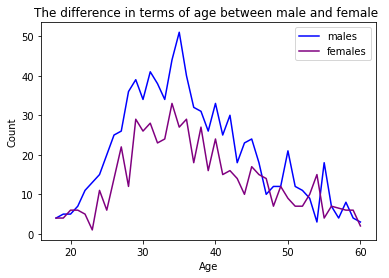

In [ ]:
import turicreate.aggregate as agg
sf1=sf['Gender','Age','EmployeeCount']
g = sf1.groupby(['Gender','Age'],{'Count': agg.SUM('EmployeeCount')}).sort('Age')
g.print_rows(num_rows=300) 

import matplotlib.pyplot as plt
g2=g[g.apply(lambda r: r['Gender'] == 'Female')]
g3=g[g.apply(lambda r: r['Gender'] == 'Male')]

%matplotlib inline
plt.plot(list(g3["Age"]), list(g3["Count"]),label="males",color="blue")
plt.plot(list(g2["Age"]), list(g2["Count"]),label="females",color="purple")
plt.xlabel("Age")
plt.title("The difference in terms of age between male and female ")
plt.ylabel("Count")
plt.legend();

The differences between a man and a woman in terms of role


+--------+---------------------------+-------+
| Gender |          JobRole          | Count |
+--------+---------------------------+-------+
|  Male  |      Sales Executive      |  194  |
|  Male  |     Research Scientist    |  178  |
|  Male  |   Laboratory Technician   |  174  |
| Female |      Sales Executive      |  132  |
| Female |     Research Scientist    |  114  |
| Female |   Laboratory Technician   |   85  |
|  Male  | Healthcare Representative |   80  |
|  Male  |   Manufacturing Director  |   73  |
| Female |   Manufacturing Director  |   72  |
|  Male  |          Manager          |   55  |
| Female | Healthcare Representative |   51  |
|  Male  |     Research Director     |   47  |
| Female |          Manager          |   47  |
|  Male  |    Sales Representative   |   45  |
| Female |    Sales Representative   |   38  |
|  Male  |      Human Resources      |   36  |
| Female |     Research Director     |   33  |
| Female |      Human Resources      |   16  |
+--------+---

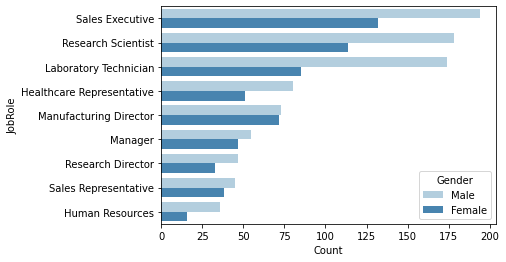

In [ ]:
import turicreate.aggregate as agg
import seaborn as sns

sf1=sf['JobRole','Age','Gender','EmployeeCount']
g = sf1.groupby(['JobRole','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count',ascending=False)
g.print_rows(num_rows=100)

#Graph
from pandas.core.frame import DataFrame
sns.barplot(x = 'Count',
            y = 'JobRole',
            hue = 'Gender',
            data = DataFrame(g),
            palette = "Blues")# Show the plot
plt.show()

Does being in a relationship affect working hours? (difference between females and males)

+--------+---------------+----------+-------+
| Gender | MaritalStatus | OverTime | Count |
+--------+---------------+----------+-------+
|  Male  |    Married    |    No    |  289  |
|  Male  |     Single    |    No    |  203  |
| Female |    Married    |    No    |  198  |
|  Male  |    Divorced   |    No    |  154  |
| Female |     Single    |    No    |  136  |
|  Male  |    Married    |   Yes    |  112  |
| Female |    Married    |   Yes    |   74  |
| Female |    Divorced   |    No    |   74  |
|  Male  |     Single    |   Yes    |   68  |
| Female |     Single    |   Yes    |   63  |
|  Male  |    Divorced   |   Yes    |   56  |
| Female |    Divorced   |   Yes    |   43  |
+--------+---------------+----------+-------+
[12 rows x 4 columns]



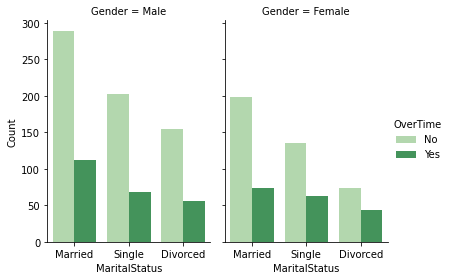

In [ ]:

sf1=sf['MaritalStatus','OverTime','Gender','EmployeeCount']
g = sf1.groupby(['MaritalStatus','OverTime','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count',ascending=False)
g.print_rows(num_rows=100)

from pandas.core.frame import DataFrame

g = sns.catplot(x="MaritalStatus", y="Count",
                hue="OverTime", col="Gender",
                data=DataFrame(g), kind="bar",
                height=4, aspect=.7,palette = "Greens");

Education vs rating in work for males and females

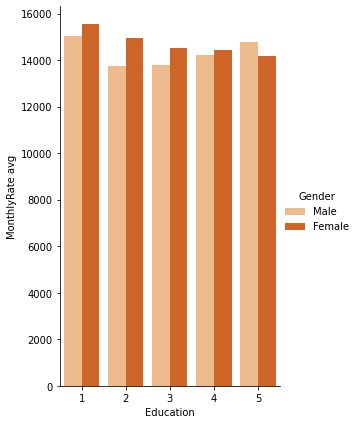

In [ ]:
sf1=sf['Gender','MonthlyRate','Education','EmployeeCount']
g=sf1.groupby(['Education','Gender'],{'MonthlyRate avg': agg.AVG('MonthlyRate')}).sort('Education')
g
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame

g = sns.catplot(x="Education", y="MonthlyRate avg",
                hue="Gender",
                data=DataFrame(g), kind="bar",
                height=6, aspect=.7,palette = "Oranges");


how monthly income affect monthly reating

Gender,Count,IncomeAvg,RatingAvg
Female,588,6686.566326530612,14674.600340136054
Male,882,6380.507936507936,14072.105442176871


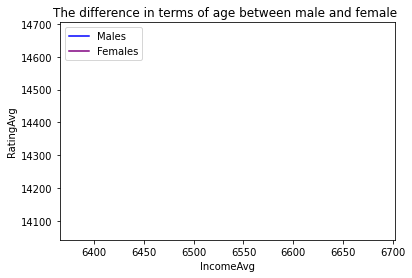

In [ ]:
import turicreate.aggregate as agg
sf1=sf['Gender','MonthlyRate','MonthlyIncome','EmployeeCount']
g = sf1.groupby(['Gender'],{'Count': agg.SUM('EmployeeCount'),'IncomeAvg':agg.AVG('MonthlyIncome'),'RatingAvg':agg.AVG('MonthlyRate')}).sort('RatingAvg',ascending=False)

import matplotlib.pyplot as plt
g2=g[g.apply(lambda r: r['Gender'] == 'Female')]
g3=g[g.apply(lambda r: r['Gender'] == 'Male')]
import seaborn as sns
%matplotlib inline
plt.plot( list(g3["IncomeAvg"]),list(g3["RatingAvg"]),label="Males",color="blue")
plt.plot(list(g2["IncomeAvg"]),list(g2["RatingAvg"]),label="Females",color="purple")
plt.xlabel("IncomeAvg") 
plt.ylabel("RatingAvg")
plt.legend();
g

the number of employee take Business Travel

In [ ]:

sf1=sf['BusinessTravel','EmployeeCount','Gender']
g = sf1.groupby(['BusinessTravel','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count')
g.print_rows(num_rows=300) 



+-------------------+--------+-------+
|   BusinessTravel  | Gender | Count |
+-------------------+--------+-------+
|     Non-Travel    | Female |   49  |
|     Non-Travel    |  Male  |  101  |
| Travel_Frequently | Female |  117  |
| Travel_Frequently |  Male  |  160  |
|   Travel_Rarely   | Female |  422  |
|   Travel_Rarely   |  Male  |  621  |
+-------------------+--------+-------+
[6 rows x 3 columns]



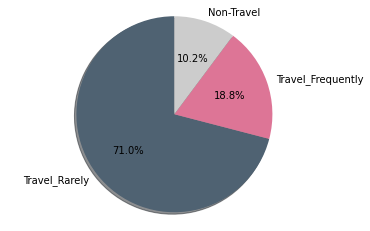

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame
from matplotlib import pyplot as plt

import turicreate.aggregate as agg
sf1=sf['BusinessTravel','EmployeeCount']
g = sf1.groupby(['BusinessTravel'],{'Count': agg.SUM('EmployeeCount')}).sort('Count')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Travel_Rarely', 'Travel_Frequently','Non-Travel'
sizes = [1043/1470, 277/1470 ,150/1470]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors=['#4F6272', '#DD7596','#cccccc'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The percentage from females that travel business travels

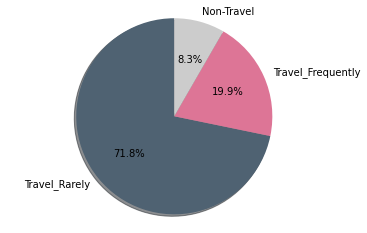

In [ ]:
import seaborn as sns
from pandas.core.frame import DataFrame
from matplotlib import pyplot as plt
import turicreate.aggregate as agg

sf1=sf['BusinessTravel','EmployeeCount','Gender']
g = sf1.groupby(['BusinessTravel','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Travel_Rarely', 'Travel_Frequently','Non-Travel'
sizes = [422/588, 117/588 ,49/588]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors=['#4F6272', '#DD7596','#cccccc'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

the percentage of males travel business travels

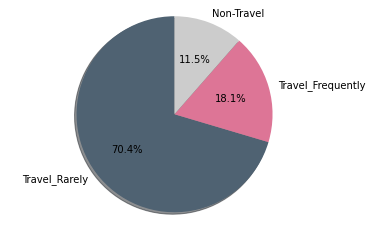

In [ ]:
import seaborn as sns
from pandas.core.frame import DataFrame
from matplotlib import pyplot as plt
import turicreate.aggregate as agg

sf1=sf['BusinessTravel','EmployeeCount','Gender']
g = sf1.groupby(['BusinessTravel','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('Count')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Travel_Rarely', 'Travel_Frequently','Non-Travel'
sizes = [621/882, 160/882 ,101/882]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors=['#4F6272', '#DD7596','#cccccc'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

how marital status affect the business travel for each gender

+-------------------+--------+---------------+-------+
|   BusinessTravel  | Gender | MaritalStatus | Count |
+-------------------+--------+---------------+-------+
|     Non-Travel    |  Male  |     Single    |   32  |
|     Non-Travel    |  Male  |    Divorced   |   33  |
|     Non-Travel    | Female |    Divorced   |   11  |
|     Non-Travel    | Female |     Single    |   15  |
|     Non-Travel    | Female |    Married    |   23  |
|     Non-Travel    |  Male  |    Married    |   36  |
| Travel_Frequently | Female |    Married    |   44  |
| Travel_Frequently |  Male  |    Married    |   74  |
| Travel_Frequently | Female |     Single    |   49  |
| Travel_Frequently |  Male  |     Single    |   47  |
| Travel_Frequently |  Male  |    Divorced   |   39  |
| Travel_Frequently | Female |    Divorced   |   24  |
|   Travel_Rarely   |  Male  |    Married    |  291  |
|   Travel_Rarely   | Female |    Married    |  205  |
|   Travel_Rarely   |  Male  |     Single    |  192  |
|   Travel

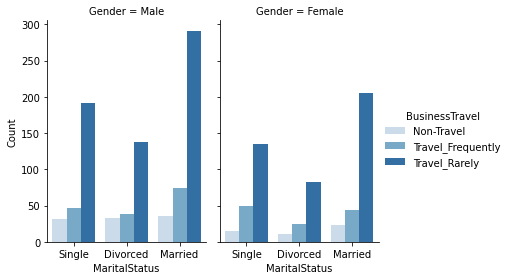

In [ ]:
sf1=sf['MaritalStatus','BusinessTravel','Gender','EmployeeCount']
g = sf1.groupby(['MaritalStatus','BusinessTravel','Gender'],{'Count': agg.SUM('EmployeeCount')}).sort('BusinessTravel')
g.print_rows(num_rows=1000)

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame

g = sns.catplot(x="MaritalStatus", y="Count",
                hue="BusinessTravel", col="Gender",
                data=DataFrame(g), kind="bar",
                height=4, aspect=.7,palette = "Blues");

How a company's distance from home affects the number of employees between women and men?

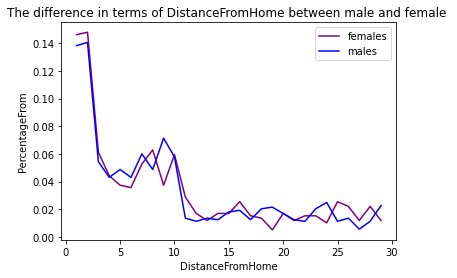

In [ ]:
sf1=sf['Gender','DistanceFromHome','EmployeeCount']
g = sf1.groupby(['Gender','DistanceFromHome'],{'Count': agg.SUM('EmployeeCount')}).sort('DistanceFromHome')
import matplotlib.pyplot as plt
g2=g[g.apply(lambda r: r['Gender'] == 'Female')]
g3=g[g.apply(lambda r: r['Gender'] == 'Male')]

import seaborn as sns
%matplotlib inline
plt.plot(list(g3["DistanceFromHome"]), list(g3["Count"]),label="males",color="blue")
plt.plot(list(g2["DistanceFromHome"]), list(g2["Count"]),label="females",color="purple")
plt.xlabel("DistanceFromHome")
plt.title("The difference in terms of DistanceFromHome between male and female ")
plt.ylabel("Count")
plt.legend()

g3['PercentageFromMales'] = g3['Count']/882
g2['PercentageFromFemales'] = g2['Count']/588
import seaborn as sns
%matplotlib inline
plt.plot(list(g2["DistanceFromHome"]),list(g2["PercentageFromFemales"]),label="females",color="purple")
plt.plot(list(g3["DistanceFromHome"]),list(g3["PercentageFromMales"]),label="males",color="blue")
plt.xlabel("DistanceFromHome")
plt.title("The difference in terms of DistanceFromHome between male and female ")
plt.ylabel("PercentageFrom")
plt.legend()

how marital status affect a distance from home in each gender

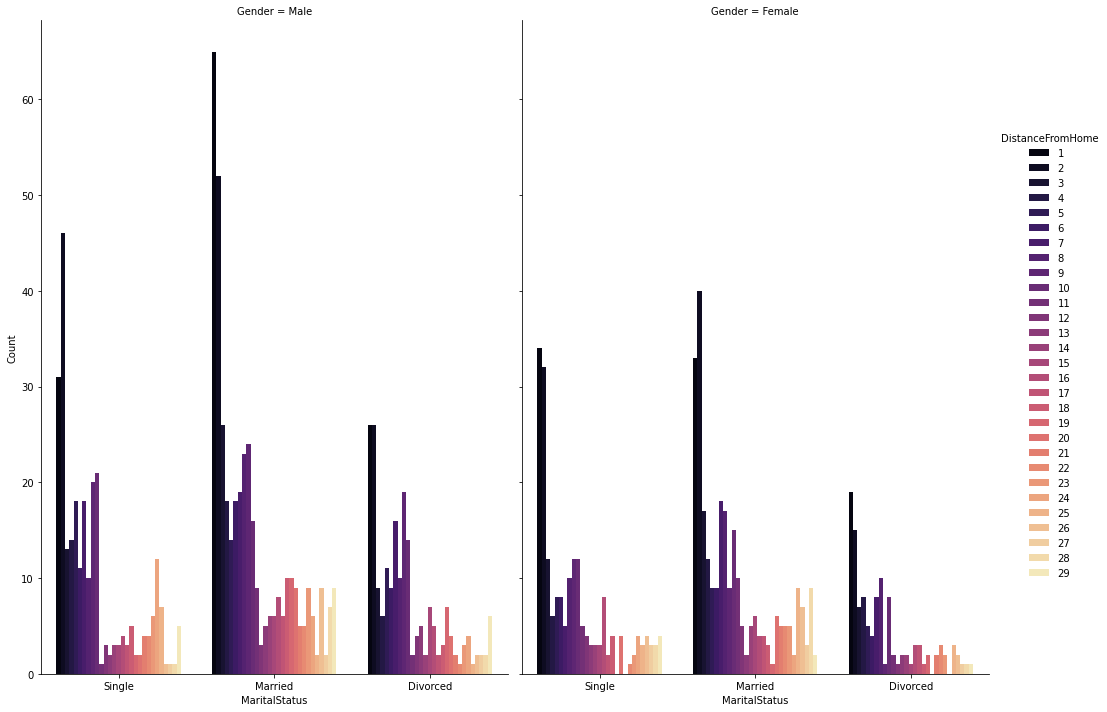

In [ ]:
sf1=sf['MaritalStatus','DistanceFromHome','Gender','EmployeeCount']
g = sf1.groupby(['MaritalStatus','DistanceFromHome','Gender'],{'Count': agg.SUM('EmployeeCount')})

import matplotlib.pyplot as plt

import seaborn as sns
from pandas.core.frame import DataFrame

g = sns.catplot(x="MaritalStatus", y="Count",
                hue="DistanceFromHome", col="Gender",
                data=DataFrame(g), kind="bar",
                height=10, aspect=.7,palette = "magma");